# A joint multilevel model for CAR 
## With Cross Validation
Using MVS.CARLeroux
## Common Markov Gaussian Random Field
 $$ [P , S ] = [P | GMRF_p] [ S | GMRF_s] $$

In [14]:
## Import code:
setwd('/apps/external_plugins/biospytial_rwrapper/biospytial.rwrapper/R/')
rm(list=ls())                                                                                     
source("init_data_4_birds.R")
library(pROC)
library('caret')

In [15]:
colnames(DataFrame)

[1] "X"               "LUCA"            "Aves"            "Passeriformes"  
 [5] "Tyrannidae"      "cellids"         "Disttoroadm"     "Elevationm"     
 [9] "MaxTempm"        "MeanTempm"       "MinTempm"        "Populationm"    
[13] "Precipitationm"  "SolarRadiationm" "VaporPresm"      "WindSpm"        
[17] "Longitude"       "Latitude"        "wwfmhtnum"       "wwfmhtnam"      
[21] "covid"           "name"            "covid2"          "tipos"          
[25] "geometry"        "sample"          "species"

In [16]:
DataFrame$species

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA  1  0 NA NA NA NA NA NA  0 NA
  [25] NA NA NA NA NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA NA NA NA NA
  [49] NA NA NA NA  1  0  1 NA NA NA NA NA NA NA NA  0 NA NA NA NA NA NA  0 NA
  [73] NA NA NA NA NA NA  0 NA NA NA NA NA NA NA NA NA  1 NA  1 NA NA NA NA NA
  [97] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA  0 NA NA
 [121] NA NA NA NA  0 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  1 NA NA
 [145]  0 NA  0 NA NA NA NA NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA  0 NA
 [169]  0 NA  1 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [193] NA NA NA  0  1 NA NA  0 NA NA  1 NA NA NA NA NA NA NA NA NA NA NA NA NA
 [217] NA NA NA NA  0 NA  0  1  1 NA  0 NA  1 NA  0 NA NA NA NA NA NA NA NA  1
 [241] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  1  0 NA NA NA NA NA  1
 [265] NA NA NA NA NA NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA NA NA NA
 [289] NA  1  0 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [313] NA NA NA NA NA NA NA NA NA  1 NA  1  0  0 NA NA NA NA NA NA NA NA NA NA
 [337] NA NA NA NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA  0  1  1 NA  0
 [361] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  1 NA
 [385]  0 NA NA NA NA NA NA  1  0  1 NA NA  0 NA NA NA NA NA NA NA NA NA NA NA
 [409] NA NA NA NA NA NA NA NA NA NA  0 NA NA NA NA NA NA NA NA NA NA  1  1  1
 [433]  0 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA NA
 [457]  1 NA NA NA NA NA  1  1 NA NA NA NA  1 NA  1 NA  1 NA NA NA NA NA NA NA
 [481] NA NA NA NA NA NA NA NA NA NA NA NA NA NA  1 NA  1 NA NA  0 NA  1 NA NA
 [505] NA NA NA NA NA  1 NA  0  0 NA NA NA  1 NA NA  0 NA  1 NA NA NA NA NA NA
 [529] NA NA NA NA NA NA NA NA  1 NA  1  1 NA  1  0  1 NA  1  1 NA NA NA NA  1
 [553] NA  1 NA NA NA NA NA NA  1  0 NA  0 NA NA NA NA NA NA NA NA NA NA NA NA
 [577]  0 NA  1  1 NA  0  1  1 NA  1  1  0  1  1 NA NA NA NA NA NA NA NA NA NA
 [601] NA NA NA NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA NA NA NA NA NA NA
 [625] NA NA NA  1  0 NA NA NA  1 NA NA NA NA NA NA NA  0 NA NA NA NA NA NA NA
 [649]  1  0 NA NA NA NA NA  0 NA NA NA NA NA NA NA NA NA  1  1  1  0  1 NA NA
 [673] NA NA NA NA  1 NA NA  1 NA NA  0 NA NA NA NA NA NA NA NA NA NA  1 NA NA
 [697]  0 NA NA NA  1  1 NA NA NA NA NA NA NA NA NA NA NA  0 NA NA NA NA NA NA
 [721] NA NA  1 NA NA NA  0 NA NA NA NA NA NA NA  1 NA NA NA NA NA NA  0  0 NA
 [745] NA NA  1 NA NA NA NA NA NA NA  1 NA NA NA NA NA NA NA NA NA NA NA NA NA
 [769]  0 NA NA  0 NA NA NA NA NA NA NA NA  1 NA NA NA NA NA NA NA NA NA NA NA
 [793] NA NA  1  0 NA NA NA NA  1 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [817] NA NA  1 NA  1  1 NA NA NA NA  1 NA NA  0  0  1  0 NA NA NA  0  0 NA NA
 [841] NA NA  1  1  1 NA NA NA NA NA  1  0 NA NA NA NA NA NA NA NA NA NA NA NA
 [865] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  1 NA NA  0  0  1 NA
 [889]  1 NA NA NA NA  0 NA NA NA NA NA NA  1 NA NA NA NA NA  1 NA NA NA NA NA
 [913] NA NA NA  1  0 NA NA NA NA NA NA NA NA  0 NA NA NA NA NA NA NA NA NA NA
 [937] NA NA NA NA NA  0 NA NA NA  0 NA NA NA NA NA NA NA NA NA NA  0  1  1  1
 [961]  1 NA NA  1 NA NA NA  1  0 NA NA NA NA NA NA  0  1  1 NA NA NA NA NA NA
 [985] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA  0 NA  0 NA
[1009] NA NA  0 NA  0  1 NA NA NA NA  0 NA  1 NA NA NA NA NA NA NA NA  0  1  0
[1033] NA NA NA NA NA NA NA  0 NA NA NA NA NA NA NA NA  0 NA  1  0 NA NA  1  0
[1057] NA NA NA NA NA NA NA NA NA NA NA NA NA  1 NA  0  1  1 NA NA NA NA NA NA
[1081]  1 NA NA NA  1 NA  0  1  1 NA  1 NA NA NA NA NA NA NA NA NA NA NA NA NA
[1105] NA NA NA NA NA NA  0 NA NA NA  0 NA NA NA NA NA NA  1 NA NA NA NA NA NA
[1129] NA  1 NA NA NA NA NA NA NA  0 NA NA NA NA NA NA NA  1 NA NA NA NA  1  1
[1153] NA NA NA NA NA NA NA NA NA NA  0 NA NA NA NA NA  0  1  0 NA NA NA  1  0
[1177] NA NA  1  1  0 NA  0 NA NA NA  1 NA NA NA NA NA NA NA NA NA NA NA NA  0
[1201] NA  1 NA NA NA  1 NA NA  0 NA  1 NA NA NA NA N

In [57]:
ntot = length(DataFrame$sample)
npresence_1 = length(na.omit(DataFrame$species[DataFrame$species == 1])) / ntot*100
nsample_1 = length(na.omit(DataFrame$sample[DataFrame$sample == 1]))/ntot*100
npresence_0 = length(na.omit(DataFrame$species[DataFrame$species == 0]))/ntot*100
nsample_0 = length(na.omit(DataFrame$sample[DataFrame$sample == 0]))/ntot*100
n_miss_presence = sum(is.na(DataFrame$species))/ntot*100
n_miss_sample = sum(is.na(DataFrame$sample))/ntot*100
cbind(npresence_0,npresence_1,nsample_0,nsample_1,n_miss_presence,n_miss_sample)

npresence_0,npresence_1,nsample_0,nsample_1,n_miss_presence,n_miss_sample
9.359606,15.02463,57.63547,24.38424,75.61576,17.9803


In [3]:
K = dim(M_bis)[1]
trials <- matrix(rep(1.0,K*2), ncol=2)

In [4]:
## This is wrong, the formula is also wrong!
## Make ROC curve


#burnin = 500
#n.sample = 1000
#thin = 1


n.sample = 10000
burnin=5000                                                                                                                                                           
thin = 5

nonas = which(! is.na(DataFrame$species) )
Y_withoutNA = DataFrame$species[nonas]
validate = createFolds(y = Y_withoutNA, k=7, returnTrain = FALSE)



DataFrame$presences <- DataFrame$species
l <- list()
i = 1
DataFrame$predicted_values_CV <- NA






In [7]:

for (fold in validate) {
    model3 = list()
    observed.presences <- DataFrame$species[fold]
    ## Substitue by NA
    DataFrame$species[fold] <- NA
    
    
    
    model3 <- MVS.CARleroux(cbind(species,sample) ~ Elevationm + MeanTempm, 
                        family = 'binomial',
                        trials=trials,
                        W=M_bis,
                        rho = 1,
                        burnin = burnin,
                        n.sample = n.sample,
                        thin = thin,
                        data = DataFrame
                         )
    

    DataFrame$species <- DataFrame$presences
    ## Return original values
    DataFrame$predicted_values_CV[fold] <- model3$fitted.values[fold]
    predicted.probability <- model3$fitted.values[fold]
    pROC_obj <- roc(observed.presences,predicted.probability)

    l[[i]] <- pROC_obj
    i = i + 1
}

Setting up the model.
Generating 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  424.7 seconds.


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Generating 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  435.9 seconds.


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Generating 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  423 seconds.


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Generating 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  438.8 seconds.


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Generating 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  426.7 seconds.


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Generating 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  423.9 seconds.


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting up the model.
Generating 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  426.5 seconds.


Setting levels: control = 0, case = 1
Setting direction: controls < cases


Setting levels: control = 0, case = 1
Setting direction: controls < cases
Warning message in plot.ci.se(sens.ci, type = "shape", col = "lightblue"):
“Low definition shape.”

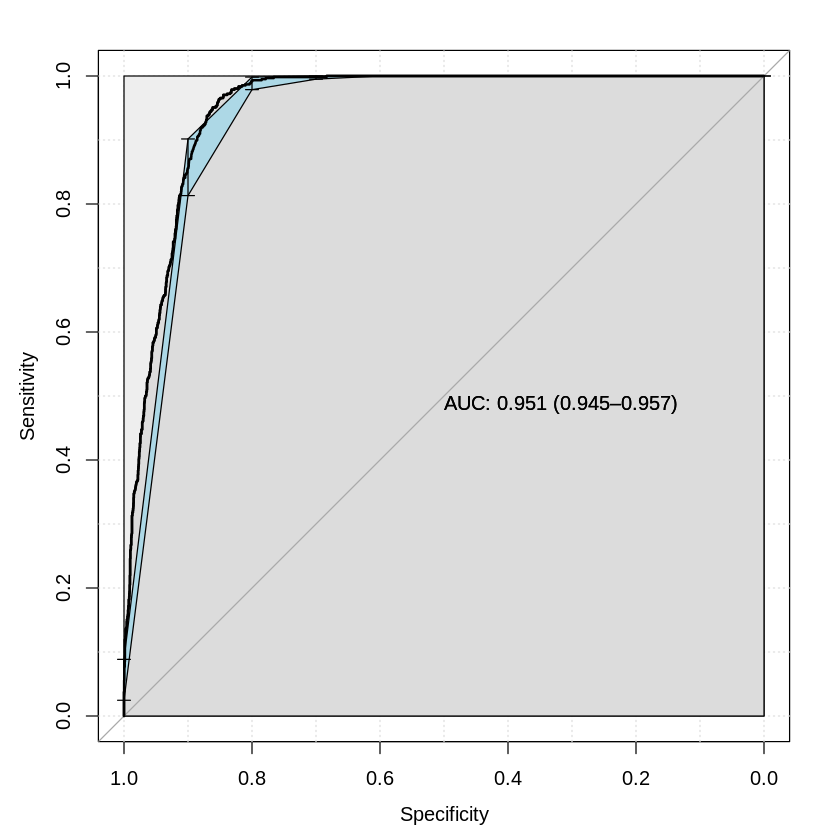

In [8]:
pROC_obj <- roc(DataFrame$species,DataFrame$predicted_values_CV,
               smoothed= TRUE,
               ci = TRUE, ci.alpha=0.9, stratified=FALSE,
               plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
               print.auc=TRUE, show.thres=TRUE)
sens.ci <- ci.se(pROC_obj)
plot(sens.ci,type="shape",col="lightblue")
plot(sens.ci, type="bars")



In [10]:
DataFrame$species


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [260] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 [519] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0
 [556] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 [630] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [667] 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 [741] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 [889] 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0
 [963] 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
[1074] 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
[1148] 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0
[1185] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
[1222] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1296] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
[1370] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[1407] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
[1444] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
[1481] 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
[1518] 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0
[1555] 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
[1592] 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0
[1629] 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
[1666] 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
[1703] 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1
[1740] 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0
[1777] 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0
[1814] 0 0 0 0 0 0 1 1 1 1 0 0 0 0

In [9]:
model3$modelfit

DIC           p.d          WAIC           p.w          LMPL 
    3892.5845     1159.0006     3655.1593      730.2959    -1897.1820 
loglikelihood 
    -787.2916

In [5]:
#burnin = 500
#n.sample = 1000
#thin = 1

burnin = 5000
n.sample = 10000
thin = 5
formula_sample =  sample ~ Disttoroadm + Populationm
formula_presence = species ~ Elevationm + Precipitationm
#model3 <- MVS.CARleroux(cbind(species,sample) ~ Elevationm + MeanTempm, 
model3 <- MVS.CARleroux(cbind(species,sample) ~ Elevationm + Precipitationm + Disttoroadm + Populationm , 
                        family = 'binomial',
                        trials=trials,
                        W=M_bis,
                        rho = 1,
                        burnin = burnin,
                        n.sample = n.sample,
                        data = DataFrame
                         )

Setting up the model.
Generating 5000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  442.5 seconds.


In [6]:
## model with NA's in Y
model3$modelfit

DIC           p.d          WAIC           p.w          LMPL 
    3905.0380     1186.0629     3667.5789      749.3933    -1896.7790 
loglikelihood 
    -766.4561

In [36]:
## model with no NA's in Y
model3$modelfit

DIC           p.d          WAIC           p.w          LMPL 
    3331.1252      797.2520     3416.3121      697.0430    -1785.8440 
loglikelihood 
    -868.3106

In [6]:
model3$summary.results

,Median,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
species - (Intercept),-0.9374,-1.6520,-0.2057,5000,53.3,110.0,1.0
species - Elevationm,0.0000,-0.0002,0.0002,5000,53.3,88.5,-1.2
species - Precipitationm,0.0001,-0.0001,0.0003,5000,53.3,150.2,-2.0
species - Disttoroadm,0.0000,-0.0002,0.0001,5000,53.3,300.1,-0.7
species - Populationm,0.0000,-0.0001,0.0001,5000,53.3,312.3,-1.3
sample - (Intercept),-1.4153,-1.9346,-0.9441,5000,53.3,85.2,0.4
sample - Elevationm,0.0000,-0.0001,0.0001,5000,53.3,100.4,0.7
sample - Precipitationm,0.0000,-0.0002,0.0002,5000,53.3,24.9,-0.8
sample - Disttoroadm,-0.0001,-0.0002,0.0000,5000,53.3,523.5,0.5
sample - Populationm,0.0000,-0.0001,0.0001,5000,53.3,232.1,-1.0


In [10]:
dim(model3$samples$phi)

[1] 5000 8120

In [11]:
dim(DataFrame)

[1] 4060   29

In [ ]:
model3$sa

## Generate datasets. several columns for summary stats

In [7]:
getUpperLowerCI <- function(fitted_sample,prefix="",MARGIN=1){
    fp = partial(quantile,probs=c(0.025,0.5,0.975))
    quants =apply(X = fitted_sample,FUN = fp,MARGIN)
    mfitt = apply(fitted_sample,mean,MARGIN = MARGIN)
    vfitt = apply(fitted_sample,var,MARGIN = MARGIN)
    new_data = cbind(t(quants),mfitt,vfitt)
    l = as.list(c("q025","median","q0975","mean","variance"))
    nnames = lapply(l,function (x){return(paste(prefix,x,sep = '_'))})
    colnames(new_data) = nnames
    return(new_data)
}

In [8]:
nK <- dim(TDF)[1]
sample_fitted <- data.frame(t(model3$samples$fitted))
sample_phi <- data.frame(t(model3$samples$phi))

In [9]:
impar = seq(from=1,to=dim(sample_fitted)[1],by=2)
par = seq(from=2,to=dim(sample_fitted)[1],by=2)

In [10]:
sS = sample_fitted[par,]
sP = sample_fitted[impar,]


In [11]:
sPS = sP * sS

In [12]:
S <- getUpperLowerCI(sS,prefix = 'S')
P <- getUpperLowerCI(sP,prefix = 'P')
PS <- getUpperLowerCI(sPS,prefix='PS')

In [13]:
sPhiS <- sample_phi[par,]
sPhiP <- sample_phi[impar,]
PhiS <- getUpperLowerCI(sPhiS,prefix='PhiS')
PhiP <- getUpperLowerCI(sPhiP,prefix='PhiP')

## Sample the posterior

In [14]:
post.sample_p = data.frame(model3$samples$fitted)
pss  <- post.sample_p %>% mutate_all(function(p) rbernoulli(1,p))
## divide samples for S and P according to the order given up
pred.S <- pss[,par]
pred.P <- pss[,impar ]
sumps <- colSums(pred.S)
sumpp <- colSums(pred.P)
nsample <- nrow(pred.S)

                                     
ProbS <- sumps / nsample
#nsample <- nrow(pred.P)
ProbP <- sumpp / nsample
ProbPS <- ProbS * ProbP
samples <- cbind(ProbP,ProbS,ProbPS)

In [25]:
sum(DataFrame$species,na.rm = TRUE)

[1] 610

## Save to posterity

In [15]:
data <- cbind(TDF$cellids,PhiP,PhiS,P ,S,PS,ProbP,ProbS,ProbPS,samples)

In [16]:
file_ = '/outputs/presence_only_models/modelCAR3-tyrannidae.csv'
write.csv(data,file_)

,ProbP,ProbS,ProbPS
X1,0.6740,0.0412,0.02776880
X3,0.0070,0.0752,0.00052640
X5,0.0284,0.0006,0.00001704
X7,0.0204,0.0366,0.00074664
X9,0.0078,0.0068,0.00005304
X11,0.1652,0.1134,0.01873368
X13,0.1926,0.0178,0.00342828
X15,0.3702,0.2444,0.09047688
X17,0.0232,0.0036,0.00008352
X19,0.0986,0.0254,0.00250444


## Save fitted samples (P,S)

In [106]:
sample_fitted <- t(model3$samples$fitted)
fitted_chain <- cbind(TDF$cellids,sample_fitted)
file2 <- '/outputs/presence_only_models/modelCAR_model3_fitted_sample.csv'
write.csv(fitted_chain,file2)

In [107]:
sample_phi <- t(model3$samples$phi)
nK <- dim(TDF)[1]

S <- sample_phi[1:nK,]
P <- sample_phi[(nK +1) : (2*nK), ]
chain = cbind(TDF$cellids,S)
file_ = '/outputs/presence_only_models/modelCAR_model3_phi_S.csv'
write.csv(chain,file_)
chain = cbind(TDF$cellids,P)
file_ = '/outputs/presence_only_models/modelCAR_model3_phi_P.csv'
write.csv(chain,file_)


 num [1:4060] 5.30e-05 1.89e-05 2.16e-07 2.14e-06 2.15e-06 ...


In [27]:
## P and S
## divide samples for S and P according to the order given up
nK <- dim(TDF)[1]
fittedv = model3$fitted.values
S <- fittedv[1:nK]
P <- fittedv[(nK +1) : (2*nK) ]
chain = cbind(TDF$cellids,S,P)
#file_ = '/outputs/presence_only_models/modelCAR_model3_fitted.csv'
#write.csv(chain,file_)


In [32]:
dim(model3$fitted.values)

[1] 4060    2

In [37]:
dPhi = data.frame(model3$samples$phi)

In [39]:
S <- dPhi[,1:nK]
P <- dPhi[,(nK +1) : (2*nK)]

In [56]:
mms = apply(dPhi,MARGIN=2,FUN = mean)

In [61]:
head(mms)

X1         X2         X3         X4         X5         X6 
-10.021744 -11.631782  -9.174576 -10.509941  -8.804521 -10.059669

In [57]:
ms = matrix(mms,nrow=nK,ncol=2,byrow = T)

In [62]:
head(ms)

-10.021744,-11.631782
-9.174576,-10.509941
-8.804521,-10.059669
-8.893093,-10.184749
-8.723113,-10.049559
-8.437156,-9.878672


In [58]:
fitted_chain <- cbind(TDF$cellids,ms)
file2 <- '/outputs/presence_only_models/modelCAR_model3_test.csv'
write.csv(fitted_chain,file2)


In [110]:
str(model3$samples$Sigma)

 num [1:50000, 1:2, 1:2] 60 60.8 58.7 61.4 57.5 ...


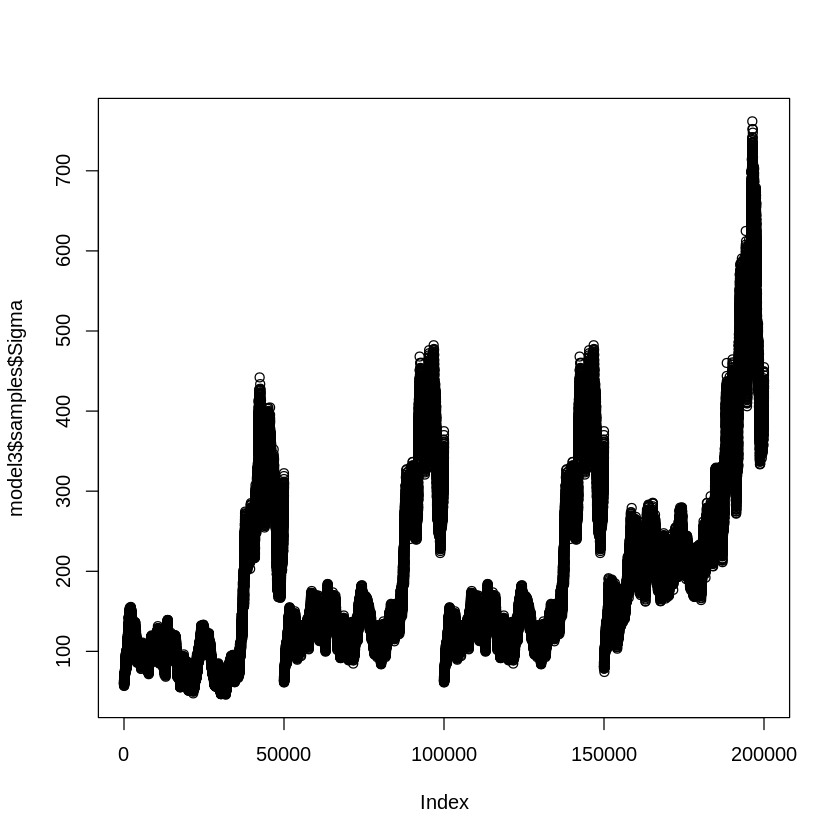

In [111]:
plot(model3$samples$Sigma)